In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Примечание: модель После масштабирования

# 1. Предобработка данных

# 1.1. Изучение данных
## Загрузка данных: Начните с загрузки датасета, проверьте его структуру и типы данных. Используйте методы типа .head(), .info(), .describe() для первичного анализа.
## Понимание проблемы: Определите, какую задачу решает ваш датасет. Задача классификации обычно предполагает, что целевая переменная (target) принимает ограниченное количество категорий.


In [2]:
df = pd.read_csv('Absenteeism_at_work.csv',sep=';')

# Примечание: Данный датасет отражает, какие личные и профессиональные характеристики могут влиять на уровень отсутствия на работе среди 740 сотрудников бразильской компании

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


# ЗАДАНИЕ: На основе характеристик сотрудника предсказать, к какому классу риска по отсутствиям он относится:низкий,средний,высокий.

# 1.2. Обработка пропущенных значений
## Анализ пропусков: Используйте методы, такие как .isnull().sum() для выявления пропущенных значений в данных.
## Заполнение или удаление:
## Для категориальных признаков можно заполнять пропуски модой.
## Для числовых признаков часто используют медиану или среднее значение.
## В случае большого количества пропущенных значений можно удалить строки или столбцы.

In [6]:
print(df.isnull().sum())

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


# Примечание: пропущенных данных нет

In [7]:
df = df.drop(columns=["ID", "Weight", "Height"])
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,35,0


# Примечание: данные являются ненужными, так как body mass index=weight/height^2

# 1.3. Обработка выбросов
## Выявление выбросов:
## Для числовых данных используйте методы, такие как boxplot или z-оценки, чтобы выявить выбросы.
## Коррекция выбросов:
## В зависимости от природы данных, выбросы можно либо удалить, либо заменить медианой/средним значением.

In [8]:
from scipy.stats import zscore

In [9]:
z_scores = zscore(df)

In [10]:
outliers = (np.abs(z_scores) > 3).any(axis=1)
df_outliers = df[outliers]
df_outliers

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
27,28,8,4,1,157,27,6,29,205.917,92,0,1,0,1,1,0,22,4
31,18,8,5,1,235,29,12,48,205.917,92,0,1,1,0,1,5,33,8
33,18,8,2,1,235,29,12,48,205.917,92,0,1,1,0,1,5,33,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,19,7,6,1,233,51,1,31,264.604,93,0,2,1,1,0,8,21,2
727,6,7,2,1,228,14,16,58,264.604,93,0,1,2,0,0,1,22,8
729,6,7,3,1,228,14,16,58,264.604,93,0,1,2,0,0,1,22,120
734,13,7,2,1,369,17,12,31,264.604,93,0,1,3,1,0,0,25,80


In [11]:
print("Общее количество выбросов:", df_outliers.sum())

Общее количество выбросов: Reason for absence                  1711.000
Month of absence                     943.000
Day of the week                      539.000
Seasons                              352.000
Transportation expense             31910.000
Distance from Residence to Work     3756.000
Service time                        1880.000
Age                                 5538.000
Work load Average/day              37861.212
Hit target                         12833.000
Disciplinary failure                  40.000
Education                            184.000
Son                                  192.000
Social drinker                        79.000
Social smoker                         54.000
Pet                                  177.000
Body mass index                     3590.000
Absenteeism time in hours           1831.000
dtype: float64


# Примечание: так как выбросы составляют 12.85% всей таблицы, заменила выбросы медианами

In [12]:
df_corrected = df.copy()
z_scores_df = pd.DataFrame(np.abs(z_scores), columns=df.select_dtypes(include='number').columns)
for col in z_scores_df.columns:
    median = df[col].median()
    df_corrected.loc[z_scores_df[col] > 3, col] = median
df_corrected=df
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,35,0


# 1.4. Категориальные переменные
## Приведение категориальных признаков к числовому виду:
## One-Hot Encoding (для признаков с несколькими категориями).
## Label Encoding (для признаков с упорядоченными категориями).
## Преобразование признаков: Убедитесь, что все категориальные переменные были правильно преобразованы.

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,0,2,1,0,1,30,8
736,11,7,3,1,235,11,14,37,264.604,93,0,2,1,0,0,1,29,4
737,0,0,3,1,118,14,13,40,271.219,95,0,0,1,1,0,8,34,0
738,0,0,4,2,231,35,14,39,271.219,95,0,0,2,1,0,2,35,0


In [14]:
print(df.columns.tolist())         

['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Body mass index', 'Absenteeism time in hours']


In [15]:
from sklearn.model_selection import train_test_split
X = df.copy()
def classify_risk(hours):
    if hours <= 2:
        return 'Низкий'
    elif hours <= 16:
        return 'Средний'
    else:
        return 'Высокий'

y = df['Absenteeism time in hours'].apply(classify_risk)
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.2,random_state=42,stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Классы:", y.value_counts())

Train shape: (592, 18)
Test shape: (148, 18)
Классы: Absenteeism time in hours
Средний    407
Низкий     289
Высокий     44
Name: count, dtype: int64


# 1.5. Масштабирование признаков
## Нормализация или стандартизация: Если ваши данные содержат признаки с разными масштабами (например, возраста и дохода), примените масштабирование:
## Min-Max Scaling (для приведения значений признаков к диапазону [0, 1]).
## Standardization (для приведения значений признаков к стандартному нормальному распределению).

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_scaled.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,0.464286,0.916667,0.75,1.000000,0.000000,0.106383,0.321429,0.322581,0.361930,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.473684,0.016667
1,1.000000,0.916667,0.50,1.000000,0.000000,0.106383,0.321429,0.322581,0.361930,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.473684,0.025000
2,0.821429,0.583333,0.50,0.000000,0.000000,0.106383,0.321429,0.322581,0.339296,0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.473684,0.016667
3,0.035714,0.250000,0.00,0.333333,0.137037,0.148936,0.464286,0.225806,0.794001,0.736842,0.0,0.0,0.5,1.0,0.0,0.0,0.315789,0.133333
4,0.785714,0.500000,0.75,0.666667,0.962963,0.936170,0.357143,0.290323,0.399914,0.789474,0.0,0.0,0.5,0.0,1.0,0.5,0.105263,0.066667


# 1.6. Разделение данных на обучающую и тестовую выборки
## Используйте метод train_test_split из библиотеки sklearn для случайного разделения данных на обучающую и тестовую выборки (например, 80% — для обучения, 20% — для тестирования).

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = df_scaled['Absenteeism time in hours'].apply(classify_risk)
X = df_scaled.drop(columns=['Absenteeism time in hours'])

# Примечание: модель будет "знать ответ" заранее, если включить Absenteeism time in hours, поэтому нужно исключить

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42,  stratify=y)

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 351 to 342
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               473 non-null    float64
 1   Month of absence                 473 non-null    float64
 2   Day of the week                  473 non-null    float64
 3   Seasons                          473 non-null    float64
 4   Transportation expense           473 non-null    float64
 5   Distance from Residence to Work  473 non-null    float64
 6   Service time                     473 non-null    float64
 7   Age                              473 non-null    float64
 8   Work load Average/day            473 non-null    float64
 9   Hit target                       473 non-null    float64
 10  Disciplinary failure             473 non-null    float64
 11  Education                        473 non-null    float64
 12  Son                      

In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 476 to 61
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               119 non-null    float64
 1   Month of absence                 119 non-null    float64
 2   Day of the week                  119 non-null    float64
 3   Seasons                          119 non-null    float64
 4   Transportation expense           119 non-null    float64
 5   Distance from Residence to Work  119 non-null    float64
 6   Service time                     119 non-null    float64
 7   Age                              119 non-null    float64
 8   Work load Average/day            119 non-null    float64
 9   Hit target                       119 non-null    float64
 10  Disciplinary failure             119 non-null    float64
 11  Education                        119 non-null    float64
 12  Son                       

In [23]:
X_train.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index
351,0.964286,0.166667,0.50,0.333333,0.225926,0.978723,0.607143,0.354839,0.265374,0.789474,0.0,0.0,0.00,1.0,0.0,0.000,0.631579
74,0.464286,0.333333,0.50,0.666667,0.000000,0.170213,0.607143,0.741935,0.193632,0.894737,0.0,0.0,0.25,1.0,0.0,0.000,0.631579
316,0.000000,0.416667,0.25,0.666667,0.000000,0.170213,0.607143,0.741935,0.183497,0.947368,1.0,0.0,0.25,1.0,0.0,0.000,0.631579
505,0.678571,0.583333,0.00,0.000000,0.633333,0.659574,0.428571,0.193548,0.401204,0.894737,0.0,0.0,0.50,1.0,0.0,0.125,0.578947
29,0.928571,0.833333,0.50,1.000000,0.633333,0.659574,0.428571,0.193548,0.274896,0.631579,0.0,0.0,0.50,1.0,0.0,0.125,0.578947


In [24]:
X_test.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index
476,0.821429,0.500000,0.50,0.000000,0.000000,0.170213,0.607143,0.741935,0.277741,0.736842,0.0,0.0,0.25,1.0,0.0,0.000,0.631579
491,0.678571,0.083333,0.00,0.333333,0.000000,0.106383,0.321429,0.322581,0.717732,1.000000,0.0,0.0,0.00,0.0,0.0,0.000,0.473684
385,0.464286,0.416667,0.50,0.666667,0.000000,0.170213,0.607143,0.741935,1.000000,0.578947,0.0,0.0,0.25,1.0,0.0,0.000,0.631579
471,0.821429,0.333333,0.75,0.666667,0.000000,0.170213,0.607143,0.741935,0.696867,0.789474,0.0,0.0,0.25,1.0,0.0,0.000,0.631579
47,0.857143,0.666667,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.000000,0.578947,0.0,0.0,0.50,1.0,0.0,0.125,0.578947


In [25]:
y_train.head()

351    Низкий
74     Низкий
316    Низкий
505    Низкий
29     Низкий
Name: Absenteeism time in hours, dtype: object

In [26]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 473 entries, 351 to 342
Series name: Absenteeism time in hours
Non-Null Count  Dtype 
--------------  ----- 
473 non-null    object
dtypes: object(1)
memory usage: 7.4+ KB


# Матрица корреляции

Text(0.5, 1.0, 'Матрица корреляции')

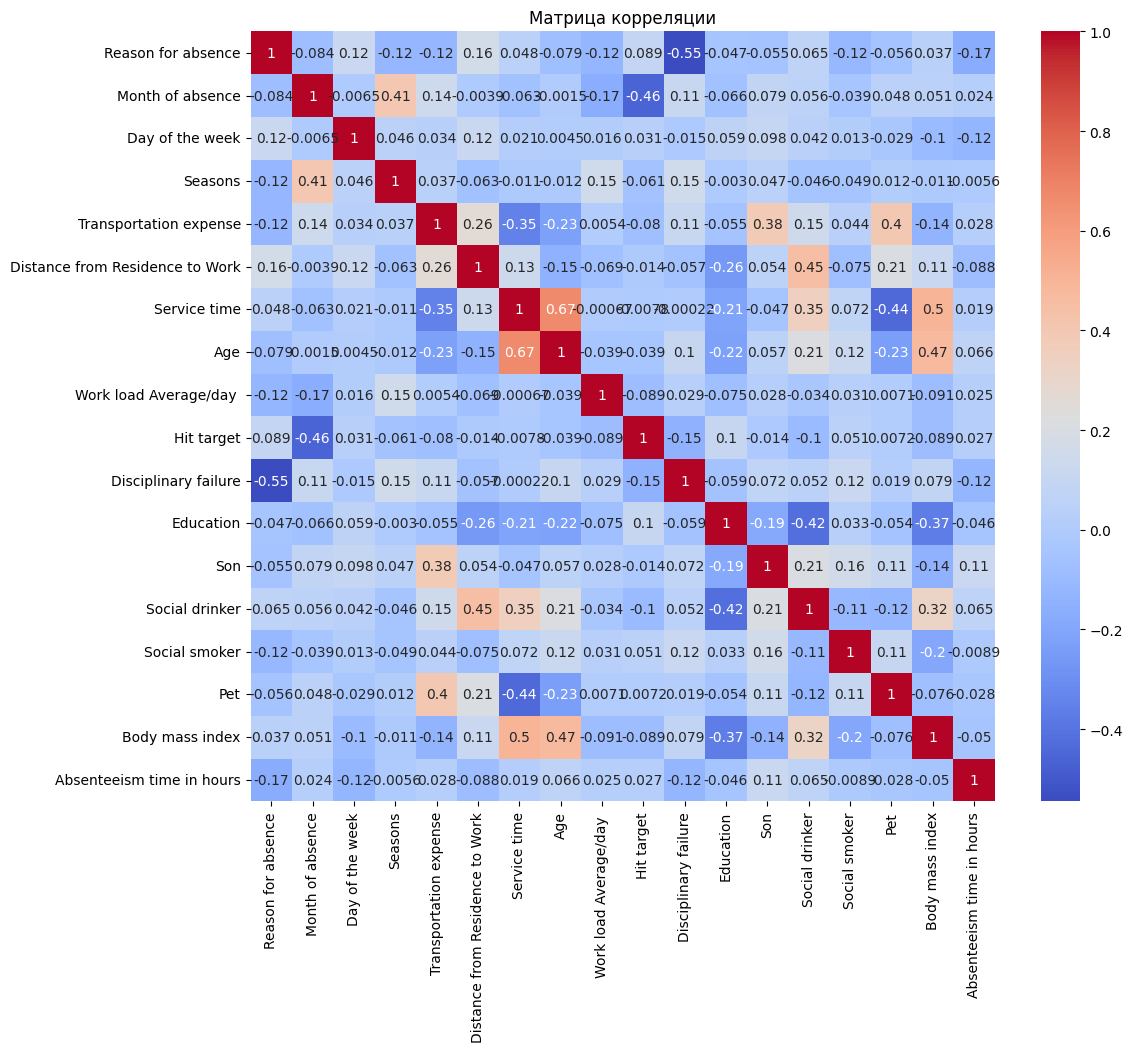

In [27]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Матрица корреляции")

# Примечание: Высокая корреляция между Age и Service: чем дольше человек работает, тем он старше

# 2. Построение прогностических моделей
## 2.1. Выбор модели
## Начните с простых моделей, таких как логистическая регрессия или дерево решений, чтобы проверить работоспособность классификации.
## Позже можно попробовать более сложные модели, такие как случайный лес, градиентный бустинг, или нейронные сети.


# Примечание: Logistic Regression

In [28]:
q1 = df_scaled['Absenteeism time in hours'].quantile(0.33)
q2 = df_scaled['Absenteeism time in hours'].quantile(0.66)

def classify_risk(hours):
    if hours <= q1:
        return 'Низкий'
    elif hours <= q2:
        return 'Средний'
    else:
        return 'Высокий'


In [29]:
df_scaled = df_scaled.copy()  # если надо
y = df_scaled['Absenteeism time in hours'].apply(classify_risk)
X = df_scaled.drop(columns=['Absenteeism time in hours'])
print(y.value_counts())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(y_train.value_counts())


Absenteeism time in hours
Средний    312
Низкий     231
Высокий     49
Name: count, dtype: int64
Absenteeism time in hours
Средний    249
Низкий     185
Высокий     39
Name: count, dtype: int64


In [30]:
df_scaled['Absenteeism time in hours'].describe()

count    592.000000
mean       0.058122
std        0.114835
min        0.000000
25%        0.016667
50%        0.025000
75%        0.066667
max        1.000000
Name: Absenteeism time in hours, dtype: float64

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logmodel.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
from sklearn.metrics import classification_report

In [33]:
predictions = logmodel.predict(X_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Высокий       0.14      0.40      0.21        10
      Низкий       0.61      0.74      0.67        46
     Средний       0.65      0.35      0.45        63

    accuracy                           0.50       119
   macro avg       0.46      0.50      0.44       119
weighted avg       0.59      0.50      0.52       119



# Примечание: Все данные лежат в одинаковом диапазоне  от 0 до 1 после масштабирования, результаты до нормализации и после отличаются

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print(confusion_matrix(y_test, predictions))

[[ 4  2  4]
 [ 4 34  8]
 [21 20 22]]


In [37]:
print(y.value_counts())


Absenteeism time in hours
Средний    312
Низкий     231
Высокий     49
Name: count, dtype: int64


# 2.2. Обучение модели
## Для каждой модели используйте методы обучения:
## Для логистической регрессии: LogisticRegression().
##  К-NN: KNNClassifier().
## Support Vector Machine: SVM().
## Используйте функцию .fit() для обучения модели на обучающих данных.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)
y_knn

array(['Низкий', 'Средний', 'Средний', 'Средний', 'Средний', 'Средний',
       'Средний', 'Низкий', 'Средний', 'Средний', 'Низкий', 'Средний',
       'Низкий', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Низкий', 'Средний',
       'Средний', 'Низкий', 'Средний', 'Средний', 'Низкий', 'Средний',
       'Средний', 'Средний', 'Низкий', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Средний', 'Средний', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Низкий', 'Низкий', 'Низкий', 'Средний',
       'Низкий', 'Средний', 'Средний', 'Низкий', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Низкий', 'Средний', 'Низкий', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Средний',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Низкий', 'Низкий',
       'Средний', 'Средний', 'Низкий', 'Низкий', 'Средний', 'Низкий',
       'Средни

In [40]:
from sklearn.svm import SVC

In [41]:
svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)
y_svm = svm.predict(X_test)
y_svm

array(['Низкий', 'Средний', 'Средний', 'Средний', 'Средний', 'Средний',
       'Низкий', 'Низкий', 'Низкий', 'Средний', 'Высокий', 'Высокий',
       'Низкий', 'Низкий', 'Низкий', 'Высокий', 'Средний', 'Низкий',
       'Низкий', 'Низкий', 'Высокий', 'Низкий', 'Низкий', 'Средний',
       'Средний', 'Высокий', 'Средний', 'Средний', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Высокий', 'Средний', 'Низкий', 'Низкий',
       'Высокий', 'Низкий', 'Высокий', 'Средний', 'Средний', 'Низкий',
       'Высокий', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Низкий', 'Низкий', 'Низкий', 'Средний',
       'Низкий', 'Средний', 'Средний', 'Низкий', 'Средний', 'Высокий',
       'Низкий', 'Средний', 'Средний', 'Средний', 'Низкий', 'Низкий',
       'Высокий', 'Высокий', 'Средний', 'Средний', 'Низкий', 'Средний',
       'Средний', 'Низкий', 'Высокий', 'Высокий', 'Низкий', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Низкий', 'Высокий', 'Низкий',
       'Средни

In [42]:
from sklearn.metrics import classification_report
print("Logistic Regression:")
print(classification_report(y_test, predictions))
print("KNN:")
print(classification_report(y_test, y_knn))
print("SVM:")
print(classification_report(y_test, y_svm))


Logistic Regression:
              precision    recall  f1-score   support

     Высокий       0.14      0.40      0.21        10
      Низкий       0.61      0.74      0.67        46
     Средний       0.65      0.35      0.45        63

    accuracy                           0.50       119
   macro avg       0.46      0.50      0.44       119
weighted avg       0.59      0.50      0.52       119

KNN:
              precision    recall  f1-score   support

     Высокий       0.00      0.00      0.00        10
      Низкий       0.50      0.54      0.52        46
     Средний       0.57      0.62      0.60        63

    accuracy                           0.54       119
   macro avg       0.36      0.39      0.37       119
weighted avg       0.50      0.54      0.52       119

SVM:
              precision    recall  f1-score   support

     Высокий       0.13      0.30      0.18        10
      Низкий       0.59      0.65      0.62        46
     Средний       0.62      0.44      0.52 

# 2.3. Оценка производительности модели
## Метрики: Для классификации обычно используют следующие метрики:
## Точность (Accuracy): процент правильных прогнозов.
## Матрица ошибок (Confusion Matrix): для оценки качества классификации.
## Precision, Recall, F1-Score: для анализа точности и полноты классификации.
## ROC-кривая и AUC (для бинарных задач классификации). (ДОПОЛНИТЕЛЬНО)


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_metrics(y_true, y_pred, average='weighted'):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average),
        'recall': recall_score(y_true, y_pred, average=average),
        'f1': f1_score(y_true, y_pred, average=average)
    }
results = {
    'Logistic Regression': get_metrics(y_test, predictions),
    'KNN': get_metrics(y_test, y_knn),
    'SVM': get_metrics(y_test, y_svm)
}
results_df = pd.DataFrame(results).T
results_df


,accuracy,precision,recall,f1
Logistic Regression,0.504202,0.588845,0.504202,0.515086
KNN,0.537815,0.496911,0.537815,0.516553
SVM,0.512605,0.567758,0.512605,0.528895


In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Text(0.5, 1.0, 'SVM')

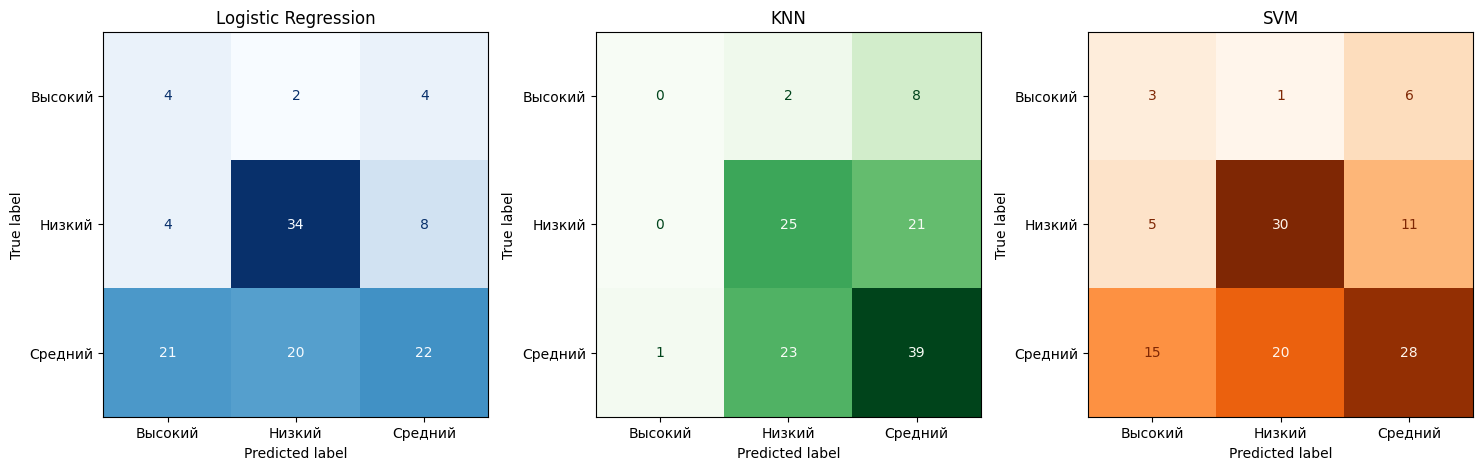

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
cm_log = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=logmodel.classes_)
disp_log.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Logistic Regression')
cm_knn = confusion_matrix(y_test, y_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('KNN')
cm_svm = confusion_matrix(y_test, y_svm, labels=svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(ax=axes[2], cmap='Oranges', colorbar=False)
axes[2].set_title('SVM')


# 2.4. Оптимизация гиперпараметров
## Используйте GridSearchCV или RandomizedSearchCV для поиска лучших гиперпараметров модели, чтобы улучшить производительность.

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [48]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [49]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [50]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [51]:
grid.best_estimator_

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.1
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [52]:
grid_predictions = grid.predict(X_test)
grid_predictions

array(['Низкий', 'Средний', 'Средний', 'Средний', 'Средний', 'Средний',
       'Средний', 'Средний', 'Средний', 'Средний', 'Высокий', 'Средний',
       'Низкий', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Низкий',
       'Низкий', 'Низкий', 'Низкий', 'Низкий', 'Низкий', 'Средний',
       'Средний', 'Низкий', 'Средний', 'Средний', 'Средний', 'Средний',
       'Средний', 'Средний', 'Средний', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Средний', 'Средний', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Низкий', 'Низкий', 'Низкий', 'Средний',
       'Низкий', 'Средний', 'Средний', 'Низкий', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Средний', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Низкий', 'Средний', 'Средний', 'Средний', 'Средний',
       'Средний', 'Средний', 'Высокий', 'Средний', 'Низкий', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Низкий',
       

In [53]:
print(confusion_matrix(y_test,grid_predictions))

[[ 0  2  8]
 [ 0 23 23]
 [ 2 15 46]]


In [54]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

     Высокий       0.00      0.00      0.00        10
      Низкий       0.57      0.50      0.53        46
     Средний       0.60      0.73      0.66        63

    accuracy                           0.58       119
   macro avg       0.39      0.41      0.40       119
weighted avg       0.54      0.58      0.55       119



# 2.5. Проверка модели на тестовых данных
## После обучения и оптимизации гиперпараметров проверьте модель на тестовых данных.
## Получите прогнозы с помощью .predict() и оцените метрики.

In [55]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.532 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [56]:
predictions = grid.predict(X_test)
predictions

array(['Низкий', 'Средний', 'Средний', 'Средний', 'Средний', 'Средний',
       'Средний', 'Средний', 'Средний', 'Средний', 'Высокий', 'Средний',
       'Низкий', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Низкий',
       'Низкий', 'Низкий', 'Низкий', 'Низкий', 'Низкий', 'Средний',
       'Средний', 'Низкий', 'Средний', 'Средний', 'Средний', 'Средний',
       'Средний', 'Средний', 'Средний', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Средний', 'Средний', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Низкий', 'Низкий', 'Низкий', 'Средний',
       'Низкий', 'Средний', 'Средний', 'Низкий', 'Средний', 'Средний',
       'Низкий', 'Средний', 'Средний', 'Средний', 'Средний', 'Низкий',
       'Средний', 'Низкий', 'Средний', 'Средний', 'Средний', 'Средний',
       'Средний', 'Средний', 'Высокий', 'Средний', 'Низкий', 'Низкий',
       'Средний', 'Низкий', 'Низкий', 'Средний', 'Средний', 'Низкий',
       

# 2.6. Анализ ошибок
## Если модель показывает плохие результаты, проанализируйте ошибки:
## Выявите, какие ошибки допускаются наиболее часто.
## Подумайте о возможных дополнительных признаках или преобразованиях, которые могут улучшить модель.

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

     Высокий       0.00      0.00      0.00        10
      Низкий       0.57      0.50      0.53        46
     Средний       0.60      0.73      0.66        63

    accuracy                           0.58       119
   macro avg       0.39      0.41      0.40       119
weighted avg       0.54      0.58      0.55       119



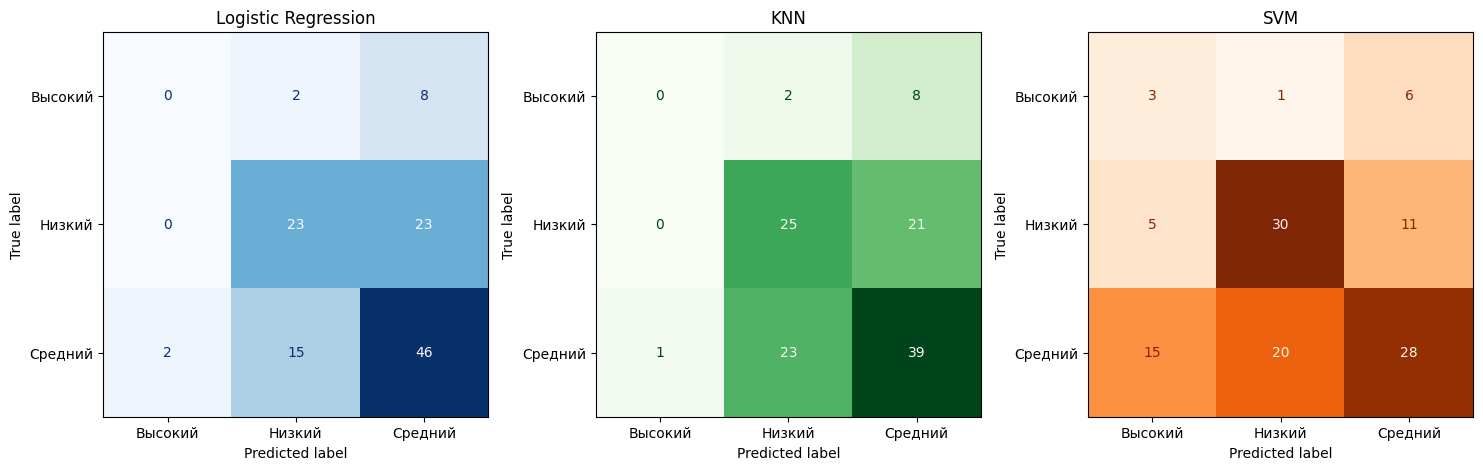

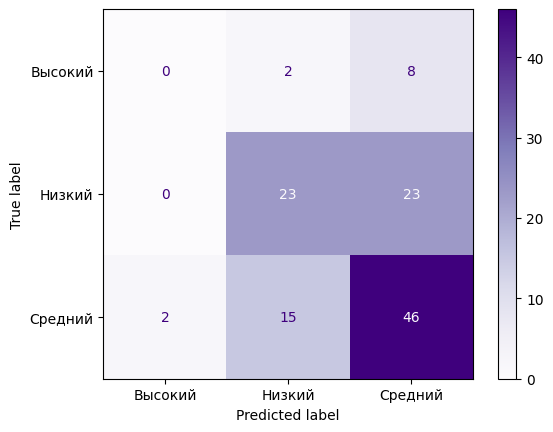

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 
cm_log = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=logmodel.classes_)
disp_log.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Logistic Regression')
cm_knn = confusion_matrix(y_test, y_knn, labels=knn.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('KNN')
cm_svm = confusion_matrix(y_test, y_svm, labels=svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp_svm.plot(ax=axes[2], cmap='Oranges', colorbar=False)
axes[2].set_title('SVM')

print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(cmap='Purples')

In [59]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.5798319327731093


# 3. Интерпретация и улучшение модели
## Используйте методы интерпретации моделей, такие как SHAP или LIME, чтобы понять, какие признаки влияют на прогноз.
## Если модель не дает удовлетворительных результатов, попробуйте:
## Добавить новые признаки.
## Применить другие методы для работы с категориальными признаками

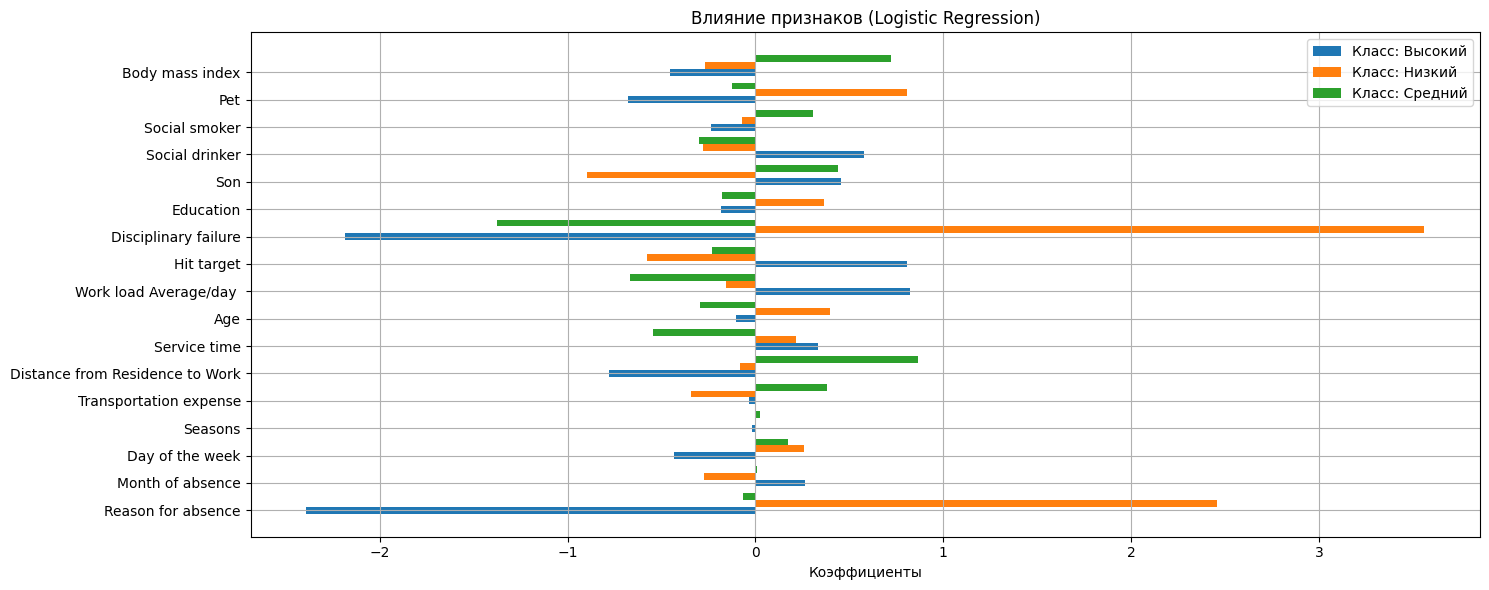

In [60]:
classes = logmodel.classes_ 
features = X_train.columns

coefficients = logmodel.coef_

plt.figure(figsize=(15, 6))
for idx, class_label in enumerate(classes):
    plt.barh(np.arange(len(features)) + idx * 0.25,
             coefficients[idx],
             height=0.25,
             label=f'Класс: {class_label}')

plt.yticks(np.arange(len(features)), features)
plt.xlabel('Коэффициенты')
plt.title('Влияние признаков (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


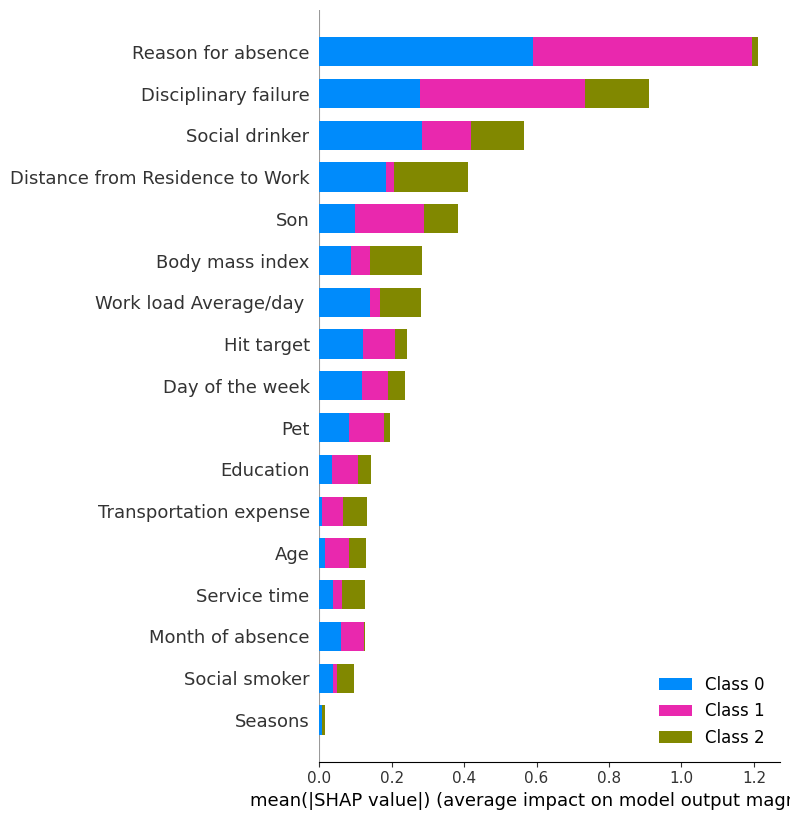

In [61]:
import shap
explainer = shap.Explainer(logmodel, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # можно добавить max_depth, min_samples_split и др.
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)

In [63]:
print("Decision Tree:")
print(classification_report(y_test, y_tree))

Decision Tree:
              precision    recall  f1-score   support

     Высокий       0.14      0.10      0.12        10
      Низкий       0.62      0.67      0.65        46
     Средний       0.68      0.67      0.67        63

    accuracy                           0.62       119
   macro avg       0.48      0.48      0.48       119
weighted avg       0.61      0.62      0.62       119



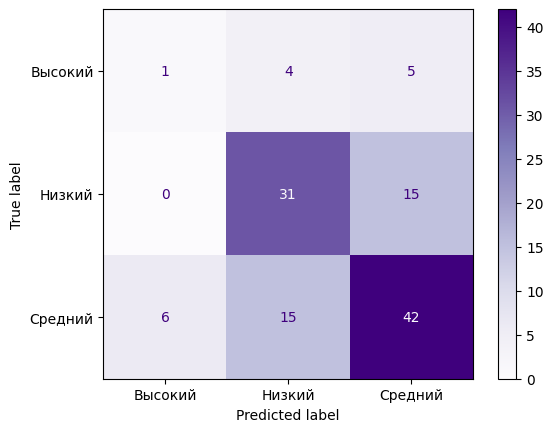

In [64]:
cm_tree = confusion_matrix(y_test, y_tree, labels=tree.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=tree.classes_)
disp_tree.plot(cmap='Purples')


In [65]:
results['Decision Tree'] = get_metrics(y_test, y_tree)
results_df = pd.DataFrame(results).T
results_df

,accuracy,precision,recall,f1
Logistic Regression,0.504202,0.588845,0.504202,0.515086
KNN,0.537815,0.496911,0.537815,0.516553
SVM,0.512605,0.567758,0.512605,0.528895
Decision Tree,0.621849,0.610302,0.621849,0.615301


In [66]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(class_weight='balanced', random_state=42), 
                         param_grid_tree, cv=5, scoring='f1_weighted')

grid_tree.fit(X_train, y_train)
print("Лучшие параметры:", grid_tree.best_params_)
y_tree_best = grid_tree.predict(X_test)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


[Text(0.637517197327044, 0.975, 'Reason for absence <= 0.804\ngini = 0.667\nsamples = 473\nvalue = [157.667, 157.667, 157.667]\nclass = Средний'),
 Text(0.3452731918238994, 0.925, 'Reason for absence <= 0.018\ngini = 0.587\nsamples = 216\nvalue = [149.581, 41.76, 82.316]\nclass = Высокий'),
 Text(0.4913951945754717, 0.95, 'True  '),
 Text(0.33898388364779874, 0.875, 'gini = 0.0\nsamples = 27\nvalue = [0.0, 23.011, 0.0]\nclass = Низкий'),
 Text(0.3515625, 0.875, 'Transportation expense <= 0.843\ngini = 0.53\nsamples = 189\nvalue = [149.581, 18.75, 82.316]\nclass = Высокий'),
 Text(0.3006092767295597, 0.825, 'Distance from Residence to Work <= 0.723\ngini = 0.508\nsamples = 164\nvalue = [149.581, 18.75, 66.486]\nclass = Высокий'),
 Text(0.21757075471698112, 0.775, 'Social drinker <= 0.5\ngini = 0.477\nsamples = 128\nvalue = [133.41, 15.341, 48.756]\nclass = Высокий'),
 Text(0.15212264150943397, 0.725, 'Work load Average/day  <= 0.608\ngini = 0.603\nsamples = 72\nvalue = [44.47, 13.636, 2

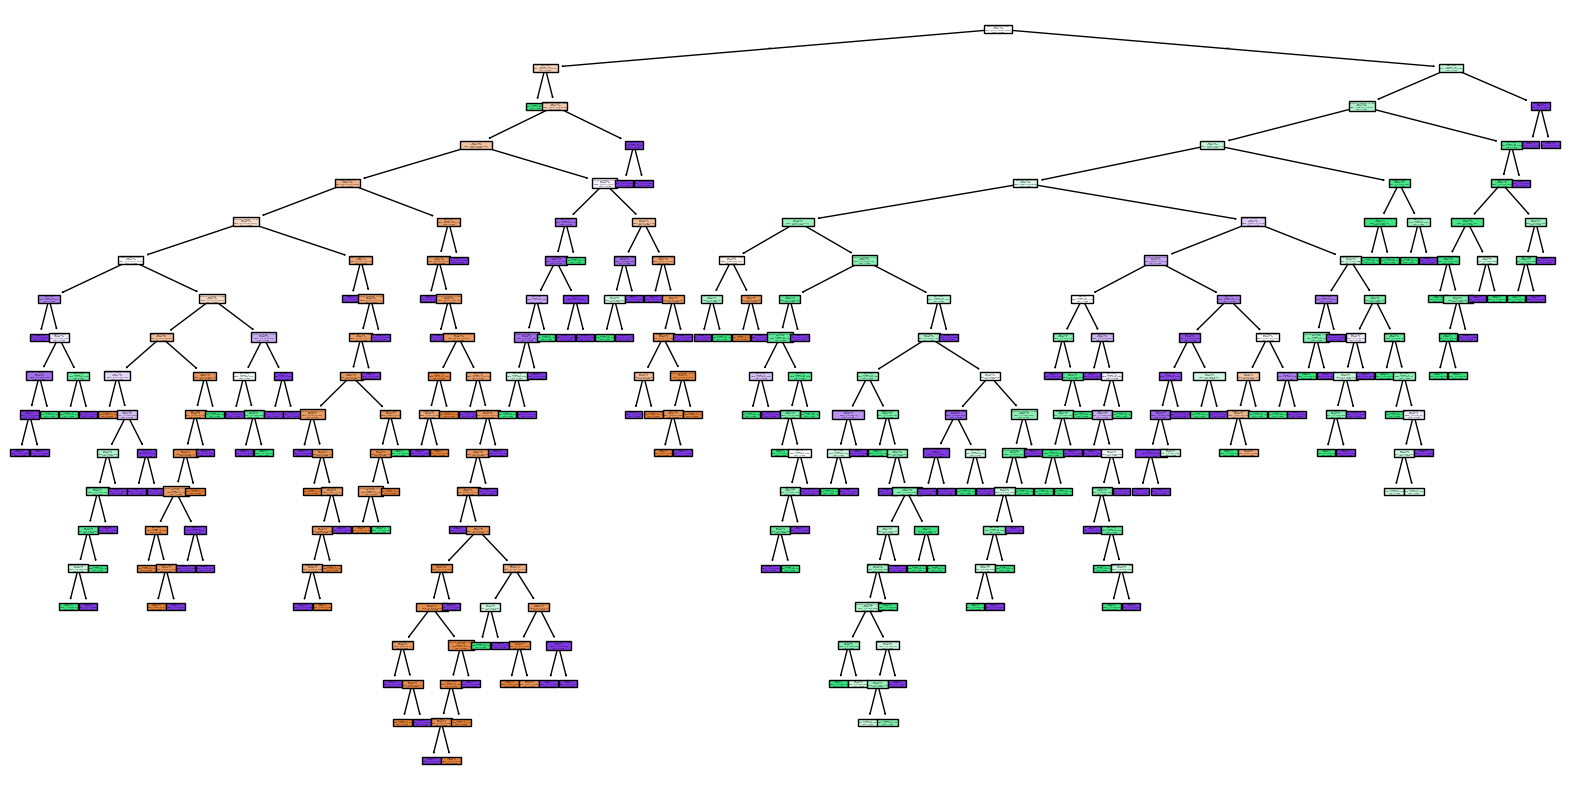

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)